<a href="https://colab.research.google.com/github/gowthamee18/bitcoin/blob/main/BitcoinArimaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter

In [2]:
import re

In [3]:
from google.colab import drive

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data/BTC-USD (2).csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data/BTC-USD (2).csv'

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
1,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
3,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800
4,2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3040,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21086.792969,21152848261
3041,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,22676.552734,28799154319
3042,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,32442278429
3043,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,24746386230
3044,2023-01-23,22700.687500,22973.865234,22673.906250,22900.279297,22900.279297,27072333824


In [ ]:
df['Market Cap'] = df['Close']*df['Volume']

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap
3040,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21086.792969,21152848261,4.460457e+14
3041,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,22676.552734,28799154319,6.530655e+14
3042,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,32442278429,7.389581e+14
3043,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,24746386230,5.622482e+14
3044,2023-01-23,22700.687500,22973.865234,22673.906250,22900.279297,22900.279297,27072333824,6.199640e+14


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap
0,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,1.965396e+10
1,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700,1.296180e+10
2,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400,1.103611e+10
3,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,8.679284e+09
4,2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300,6.004506e+09


In [ ]:
df = df.drop(['Adj Close'], axis = 1)

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
3040,2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21152848261,4.460457e+14
3041,2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,28799154319,6.530655e+14
3042,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,32442278429,7.389581e+14
3043,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,24746386230,5.622482e+14
3044,2023-01-23,22700.687500,22973.865234,22673.906250,22900.279297,27072333824,6.199640e+14


<class 'pandas.core.frame.DataFrame'>
                 Close
Date                  
2014-09-23  435.790985
2014-09-24  423.204987
2014-09-25  411.574005
2014-09-26  404.424988
2014-09-27  399.519989


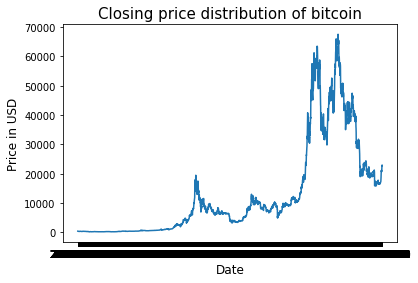

In [ ]:
data = df['Close']
Date1 = df['Date']
train1 = df[['Date','Close']]
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())
plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

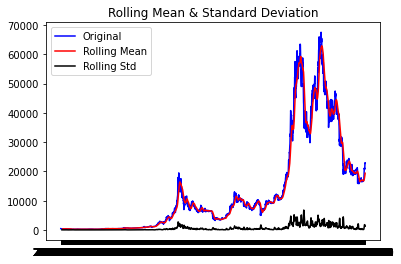

ADF Stastistic: -1.593672
p-value: 0.486772
The graph is non stationery
Critical values:
	1%: -3.433 
	5%: -2.862 
	10%: -2.567 


In [ ]:
def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)

    #Perform Dickey Fuller test
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

ts = train2['Close']
test_stationarity(ts)

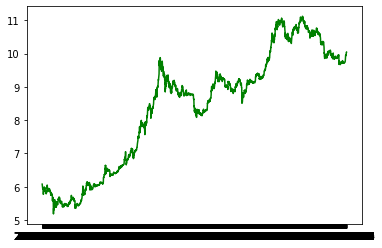

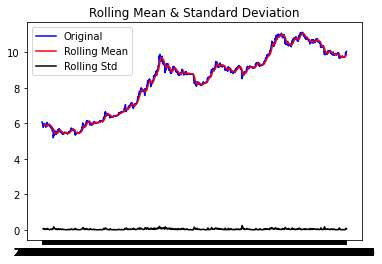

ADF Stastistic: -0.959877
p-value: 0.767616
The graph is non stationery
Critical values:
	1%: -3.433 
	5%: -2.862 
	10%: -2.567 


In [ ]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

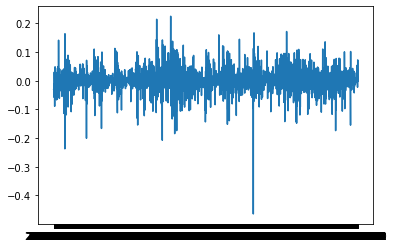

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

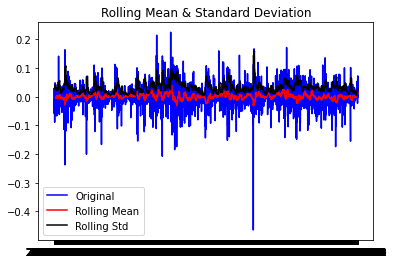

ADF Stastistic: -56.149529
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.862 
	10%: -2.567 


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

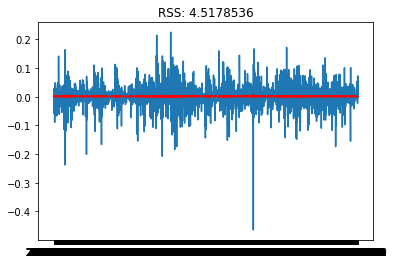

In [ ]:
model = ARIMA(ts_log, order=(1,1,0))
results_ARIMA = model.fit(disp=-1)
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


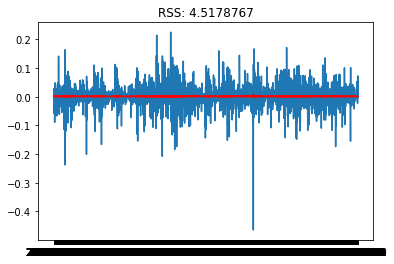

In [ ]:
model = ARIMA(ts_log, order=(0,1,1))
results_MA = model.fit(disp=-1)
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


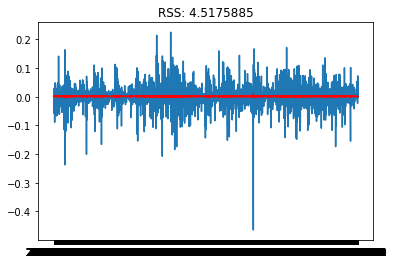

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2,1,0))
results_ARIMA = model.fit(disp=-1)
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

Printing Predicted vs Expected Values...


predicted = 19093.017461,   expected = 19268.093750,   error = 0.908633  %
predicted = 19288.142808,   expected = 19550.757813,   error = 1.343247  %
predicted = 19572.440769,   expected = 19334.416016,   error = 1.231094  %
predicted = 19366.305259,   expected = 19139.535156,   error = 1.184826  %
predicted = 19166.379408,   expected = 19053.740234,   error = 0.591166  %
predicted = 19078.457831,   expected = 19172.468750,   error = 0.490343  %
predicted = 19194.249599,   expected = 19208.189453,   error = 0.072572  %
predicted = 19233.447819,   expected = 19567.007813,   error = 1.704706  %
predicted = 19585.671957,   expected = 19345.572266,   error = 1.241109  %
predicted = 19378.188882,   expected = 20095.857422,   error = 3.571226  %
predicted = 20104.972876,   expected = 20770.441406,   error = 3.203921  %
predicted = 20791.320058,   expected = 20285.835938,   error = 2.491808  %
predicted = 20327.723892,   expected = 20595.351563,   er

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20962.244708,   expected = 20602.816406,   error = 1.744559  %
predicted = 20633.434032,   expected = 18541.271484,   error = 11.283814  %
predicted = 18600.357238,   expected = 15880.780273,   error = 17.124958  %
predicted = 15922.869301,   expected = 17586.771484,   error = 9.461101  %
predicted = 17556.162414,   expected = 17034.292969,   error = 3.063640  %
predicted = 17080.025490,   expected = 16799.185547,   error = 1.671747  %
predicted = 16820.636789,   expected = 16353.365234,   error = 2.857342  %
predicted = 16380.377067,   expected = 16618.199219,   error = 1.431095  %
predicted = 16630.139006,   expected = 16884.613281,   error = 1.507137  %
predicted = 16902.438296,   expected = 16669.439453,   error = 1.397761  %
predicted = 16696.299716,   expected = 16687.517578,   error = 0.052627  %
predicted = 16706.243476,   expected = 16697.777344,   error = 0.050702  %
predicted = 16718.414954,   expected = 16711.546875,   error = 0.041098  %
predicted = 16732.07146

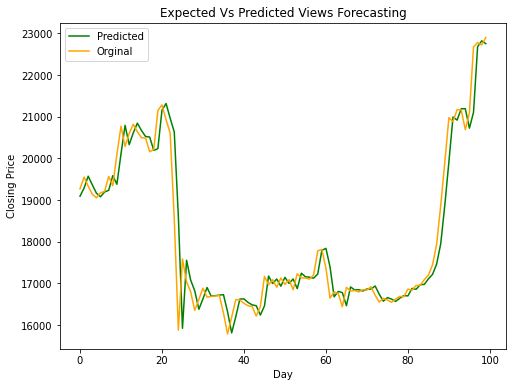

In [ ]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()